<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import glob
import pickle
import matplotlib.pyplot as plt
from matplotlib import gridspec
import numpy as np

def cm2inch(*tupl):
    inch = 2.54
    if isinstance(tupl[0], tuple):
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)

In [2]:
import seaborn as sns
sns.set()
sns.set_style('white')
sns.set_style('ticks')
plt.style.use('../my_rcparams.mplstyle')

In [3]:
mypath = glob.glob('../../data_final/SM_pin_detuning.pkl')
panel_a = pickle.load(open(mypath[0],'rb'))
panel_a.keys()

dict_keys(['xmeas', 'ymeas', 'xtheo0', 'ytheo0', 'shift0', 'xtheo1', 'ytheo1', 'shift1', 'xlabel', 'ylabel'])

In [4]:
dpi = 1000
figtextsize=10

In [5]:
import matplotlib
cmap = matplotlib.cm.get_cmap('YlGn_r')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


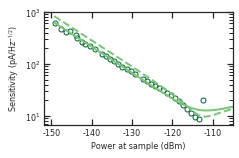

In [6]:
plt.style.use('../my_rcparams.mplstyle')

fig = plt.figure(figsize=cm2inch(8.6, 5.3))
gs = gridspec.GridSpec(1, 1)

axa = fig.add_subplot(gs[0, 0])
plt.plot(panel_a['xmeas'],
         panel_a['ymeas'],
         'o',
         markerfacecolor='none',
         c=cmap(0.1),
         zorder=-1)
plt.plot(panel_a['xtheo0'], panel_a['ytheo0'], c=cmap(0.5), zorder=-1)
plt.plot(panel_a['xtheo1'],
         panel_a['ytheo1'],
         c=cmap(0.5),
         ls='dashed',
         zorder=-1)
plt.xlabel(panel_a['xlabel'])
plt.ylabel('Sensitivity (pA/Hz$^{-1/2}$)')
plt.yscale('log')
plt.gca().set_ylim(top=1e3)
plt.gca().set_xlim(right=-105)

plt.savefig('SM_Pin_detuning.pdf', bbox_inches='tight', dpi=dpi)
plt.show()
plt.close()